This lab is based on the following https://github.com/adambielski/siamese-triplet/blob/master/Experiments_MNIST.ipynb

We will train on MNIST dataset using pairwise and triplet ranking losses. From the implementation point of view the trickiest thing is constructing the dataset loader. We will use the pre-constructed data loaders that we will download from the file below

In [ ]:
!wget https://raw.githubusercontent.com/adambielski/siamese-triplet/master/datasets.py

--2021-04-12 20:41:56--  https://raw.githubusercontent.com/adambielski/siamese-triplet/master/datasets.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8106 (7.9K) [text/plain]
Saving to: ‘datasets.py’

datasets.py         100%[===================>]   7.92K  --.-KB/s    in 0s      

2021-04-12 20:41:56 (99.2 MB/s) - ‘datasets.py’ saved [8106/8106]



In [ ]:
from torchvision.datasets import MNIST
from torchvision import transforms

mean, std = 0.1307, 0.3081

train_dataset = MNIST('../data/MNIST', train=True, download=True,
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
test_dataset = MNIST('../data/MNIST', train=False, download=True,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((mean,), (std,))
                            ]))
n_classes = 10

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw




Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Below is the dataloader you will use to train this, and an illustration of what it returns. Run this just to get an idea of what the dataloader is doing here. Essentially for a batch size of 32 it will return 32 triplets (indexed by j below)



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


<Figure size 432x288 with 0 Axes>

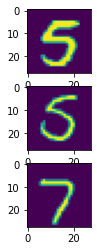

In [ ]:
from datasets import TripletMNIST
import torch

triplet_train_dataset = TripletMNIST(train_dataset)
triplet_train_loader = torch.utils.data.DataLoader(triplet_train_dataset, batch_size=32, shuffle=True)


(im1,im2,im3),_ = next(iter(triplet_train_loader))
#anchor, positive, negative
import matplotlib.pyplot as plt

plt.figure()

j=4 

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(im1[j].squeeze()) 
axarr[1].imshow(im2[j].squeeze())
axarr[2].imshow(im3[j].squeeze())


Train the model using the triplet loss (https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginLoss.html). At each iteration load the 3 samples using the dataloader to act as anchor, positive, negative. Use 20 epochs for training and the adam optimizer with a suggested learning rate of 1e-3. You may experiment with margin parameters (suggest 0.05 to 0.5).

In [ ]:
#Use this model
model = n.Sequential(nn.Conv2d(1, 32, 5), nn.ReLU(),
                      nn.MaxPool2d(2, stride=2),
                      nn.Conv2d(32, 64, 5), nn.ReLU(),
                      nn.MaxPool2d(2, stride=2))

#Use these dataloaders
from datasets import TripletMNIST

triplet_train_dataset = TripletMNIST(train_dataset)
triplet_train_loader = torch.utils.data.DataLoader(triplet_train_dataset, batch_size=32, shuffle=True)


for epoch in range(20):
  for (im1,im2,im3),_ in triplet_train_loader:
    #Fill in

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


2

Embedd the entire training set and perform classification on the 500 test set images using a nearest neighbor approach. Report the overall accuracy. Finally show the 5 nearest neighbor for 2 randomly selected samples.

In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=500, shuffle=False)